In [25]:
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
from deap import base, creator, tools, algorithms
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [26]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [27]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


In [28]:
all_features = np.load('/Users/saikarthik/Desktop/scp/model_building/f.npy')
all_labels = np.load('/Users/saikarthik/Desktop/scp/model_building/l.npy')



In [29]:
all_features.shape

(6672, 52047)

In [30]:
all_labels.shape

(6672, 4)

In [31]:
y = np.argmax(all_labels, axis=1)

In [32]:
y

array([3, 3, 3, ..., 2, 2, 2])

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split( all_features, y, test_size=0.2, random_state=42 )

In [34]:
num_classes=4


In [35]:
def evaluate_model(individual):
    num_layers = int(individual[0])  
    neurons_per_layer = individual[1]
    dropout_rate = individual[2]

    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))

    for _ in range(num_layers):
        model.add(layers.Dense(neurons_per_layer, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0, callbacks=[early_stopping])

    _, accuracy = model.evaluate(x_test, y_test, verbose=0)
    
    return accuracy,  

In [36]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("num_layers", lambda: random.choice([2, 3, 4, 5])) 
toolbox.register("neurons_per_layer", lambda: random.choice([128, 256, 512, 1024]))
toolbox.register("dropout_rate", lambda: random.uniform(0.1, 0.5))  

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.num_layers, toolbox.neurons_per_layer, toolbox.dropout_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_model)
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutPolynomialBounded, low=[2, 128, 0.1], up=[5, 1024, 0.5], eta=1.0, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)


/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [37]:
population = toolbox.population(n=10) 
NGEN = 5 
CXPB, MUTPB = 0.5, 0.2 

best_accuracy = 0 
best_model = None 

for gen in range(NGEN):
    print(f"Generation {gen+1}")
    
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    population[:] = toolbox.select(offspring, len(population))

    best_ind = tools.selBest(population, 1)[0]
    current_accuracy = best_ind.fitness.values[0]

    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        num_layers = int(best_ind[0])
        neurons_per_layer = int(best_ind[1])
        dropout_rate = best_ind[2]
        best_model = models.Sequential()
        best_model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))
        for _ in range(num_layers):
            best_model.add(layers.Dense(neurons_per_layer, activation='relu'))
            best_model.add(layers.Dropout(dropout_rate))

        best_model.add(layers.Dense(4, activation='softmax'))

        best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"Best individual in generation {gen}: {best_ind}")
    print(f"Best fitness in generation {gen}: {best_ind.fitness.values[0]}")

print(f"Best individual after all generations: {best_ind}")
print(f"Best fitness after all generations: {best_ind.fitness.values[0]}")


Generation 1
Best individual in generation 0: [5, 256, 0.374906852278011]
Best fitness in generation 0: 0.9063670635223389
Generation 2
Best individual in generation 1: [5, 256, 0.17301593886630628]
Best fitness in generation 1: 0.9400749206542969
Generation 3
Best individual in generation 2: [3, 256, 0.10968447814464022]
Best fitness in generation 2: 0.922097384929657
Generation 4
Best individual in generation 3: [5, 256, 0.29869873520409473]
Best fitness in generation 3: 0.9265917539596558
Generation 5
Best individual in generation 4: [5, 256, 0.29869873520409473]
Best fitness in generation 4: 0.9265917539596558
Best individual after all generations: [5, 256, 0.29869873520409473]
Best fitness after all generations: 0.9265917539596558


In [38]:

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))  

for _ in range(num_layers):
    model.add(layers.Dense(neurons_per_layer, activation='relu'))
    model.add(layers.Dropout(dropout_rate))

model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_392 (Dense)           (None, 256)               13324288  
                                                                 
 dropout_314 (Dropout)       (None, 256)               0         
                                                                 
 dense_393 (Dense)           (None, 256)               65792     
                                                                 
 dropout_315 (Dropout)       (None, 256)               0         
                                                                 
 dense_394 (Dense)           (None, 256)               65792     
                                                                 
 dropout_316 (Dropout)       (None, 256)               0         
                                                                 
 dense_395 (Dense)           (None, 256)             

In [39]:
history = best_model.fit(x_train, y_train, epochs=20, batch_size=64,validation_data=[x_train, y_train])


Epoch 1/20
84/84 [==============================] - 5s 49ms/step - loss: 1.4389 - accuracy: 0.5265 - val_loss: 0.8499 - val_accuracy: 0.7233
Epoch 2/20
84/84 [==============================] - 3s 41ms/step - loss: 0.8571 - accuracy: 0.7173 - val_loss: 0.3190 - val_accuracy: 0.9074
Epoch 3/20
84/84 [==============================] - 3s 41ms/step - loss: 0.4582 - accuracy: 0.8756 - val_loss: 0.0932 - val_accuracy: 0.9745
Epoch 4/20
84/84 [==============================] - 3s 40ms/step - loss: 0.2060 - accuracy: 0.9460 - val_loss: 0.0447 - val_accuracy: 0.9861
Epoch 5/20
84/84 [==============================] - 3s 41ms/step - loss: 0.1532 - accuracy: 0.9607 - val_loss: 0.0277 - val_accuracy: 0.9921
Epoch 6/20
84/84 [==============================] - 3s 40ms/step - loss: 0.1030 - accuracy: 0.9738 - val_loss: 0.0225 - val_accuracy: 0.9934
Epoch 7/20
84/84 [==============================] - 3s 41ms/step - loss: 0.0708 - accuracy: 0.9798 - val_loss: 0.0171 - val_accuracy: 0.9949
Epoch 8/20
84

In [40]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

42/42 [==============================] - 0s 4ms/step - loss: 0.6265 - accuracy: 0.9423
Test Loss: 0.6264841556549072
Test Accuracy: 0.9423220753669739


In [41]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


42/42 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.01      0.89      0.03        18
           2       0.58      0.12      0.20       645
           3       0.60      0.01      0.01       475

    accuracy                           0.07      1335
   macro avg       0.30      0.25      0.06      1335
weighted avg       0.50      0.07      0.10      1335



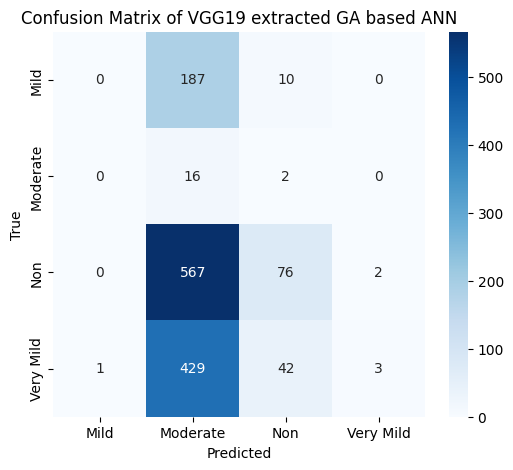

In [42]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Mild", "Moderate", "Non", "Very Mild"], yticklabels=["Mild", "Moderate", "Non", "Very Mild"])
plt.title("Confusion Matrix of VGG19 extracted GA based ANN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

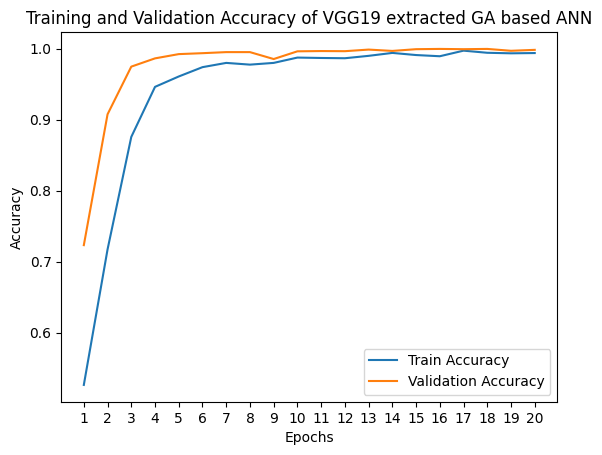

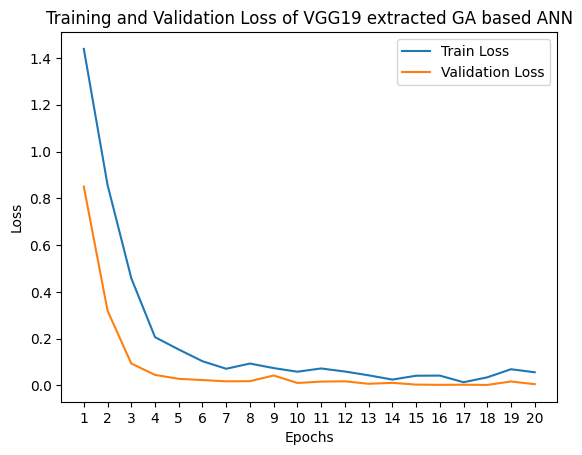

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of GA based ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(len(history.history['accuracy'])), range(1, len(history.history['accuracy']) + 1))
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss of GA based ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(range(len(history.history['loss'])), range(1, len(history.history['loss']) + 1))
plt.show()


In [44]:
best_model.save("ga_ann.h5")

/Users/saikarthik/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
